Import thư viện cơ bản 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Đi tới thư mục làm việc

In [3]:
%cd /content/drive/MyDrive/Logistic

/content/drive/MyDrive/Logistic


# Read data

- Đọc file data và tiền xử lý về kiểu dữ liệu:
 - Cột `date` đổi từ kiểu string sang datetime
 - Cột `product_id` đổi từ kiểu int sang kiểu string

In [4]:
daily_demand = pd.read_csv('data/daily_demand.csv')

# TODO: check dtypes & preprocess 
daily_demand['date'] = pd.to_datetime(daily_demand['date'])
daily_demand['product_id'] = daily_demand['product_id'].astype(str)
daily_demand.dtypes

product_id                      object
date                    datetime64[ns]
demand                           int64
Description                     object
Group                           object
Brand                           object
CasePerPallet                    int64
KgPerCase                      float64
ShelfLifeInDays                  int64
NetSalesValuePerCase             int64
COGSPerCase                      int64
ProfitPerCase                    int64
DailyProfit                      int64
ShelfLifeLabel                  object
StockMovement                   object
Profitability                   object
Perish                          object
Summer                           int64
EventDay                         int64
dtype: object

$\to$ Từ output, thấy rằng kiểu dữ liệu mỗi cột đã hợp lý

- Khám phá dữ liệu tổng quát

In [5]:
daily_demand.agg([pd.Series.nunique, pd.Series.unique])

,product_id,date,demand,Description,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,23,1127,404,23,7,8,9,15,3,21,22,22,3125,3,3,3,9,2,2
unique,"[12385000, 12477101, 12425670, 12382307, 12435...","[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[87, 321, 111, 102, 113, 77, 112, 144, 170, 25...","[MILO Chocolate Malt Cup 18x55g TH, NESTLE MOC...","[CUP, SANDWICH, STICK, CONE, NESTEA IC, PINT, ...","[MILO, MOCHI, KITKAT, OREO, NAMA, NESTEA IC, L...","[270, 153, 171, 252, 220, 112, 156, 200, 84]","[0.99, 1.5, 2.04, 1.43, 1.56, 2.16, 3.89, 2.25...","[730, 365, 180]","[157000, 450000, 419000, 327000, 360000, 57600...","[47100, 121500, 138270, 107910, 118800, 155520...","[109900, 328500, 280730, 219090, 241200, 42048...","[9561300, 35277900, 12198900, 11209800, 124187...","[Long, Medium, Short]","[Fast, Normal, Slow]","[A, B, C]","[C3, C2, B3, B2, B1, A3, A2, A1, C1]","[0, 1]","[0, 1]"


- Khám phá dữ liệu cho từng sản phẩm

In [6]:
except_cols = ['product_id', 'Description']

for id in daily_demand['product_id'].unique():
    prod_df = daily_demand.loc[daily_demand['product_id'] == id].drop(columns=except_cols)
    print(f"---------------------------------{id}---------------------------------")
    display(prod_df.agg([pd.Series.nunique, pd.Series.unique]))
    print()

---------------------------------12385000---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,283,1,1,1,1,1,1,1,1,283,1,2,2,2,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[87, 321, 111, 102, 113, 77, 112, 144, 170, 25...",[CUP],[MILO],[270],[0.99],[730],[157000],[47100],[109900],"[9561300, 35277900, 12198900, 11209800, 124187...",[Long],"[Fast, Normal]","[A, B]","[C3, C2]","[0, 1]","[0, 1]"



---------------------------------12477101---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,151,1,1,1,1,1,1,1,1,151,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[35, 231, 128, 37, 22, 63, 129, 149, 33, 9, 40...",[SANDWICH],[MOCHI],[153],[1.5],[365],[450000],[121500],[328500],"[11497500, 75883500, 42048000, 12154500, 72270...",[Medium],"[Fast, Normal, Slow]","[A, B, C]","[B3, B2, B1]","[0, 1]","[0, 1]"



---------------------------------12425670---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,192,1,1,1,1,1,1,1,1,192,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[71, 98, 95, 26, 125, 42, 75, 52, 86, 209, 123...",[STICK],[KITKAT],[171],[2.04],[365],[419000],[138270],[280730],"[19931830, 27511540, 26669350, 7298980, 350912...",[Medium],"[Fast, Normal, Slow]","[A, B, C]","[B3, B2, B1]","[0, 1]","[0, 1]"



---------------------------------12382307---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,174,1,1,1,1,1,1,1,1,174,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[56, 131, 180, 35, 105, 57, 28, 151, 172, 166,...",[CONE],[OREO],[252],[1.43],[180],[327000],[107910],[219090],"[12269040, 28700790, 39436200, 7668150, 230044...",[Short],"[Fast, Normal, Slow]","[A, B, C]","[A3, A2, A1]","[0, 1]","[0, 1]"



---------------------------------12435405---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,89,1,1,1,1,1,1,1,1,89,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[22, 63, 88, 5, 15, 24, 59, 58, 106, 82, 48, 3...",[STICK],[NAMA],[220],[1.56],[730],[360000],[118800],[241200],"[5306400, 15195600, 21225600, 1206000, 3618000...",[Long],"[Fast, Slow, Normal]","[A, C, B]","[C3, C1, C2]","[0, 1]","[0, 1]"



---------------------------------12426559---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,121,1,1,1,1,1,1,1,1,121,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[71, 53, 65, 39, 25, 20, 23, 44, 66, 57, 45, 1...",[SANDWICH],[OREO],[153],[2.16],[730],[576000],[155520],[420480],"[29854080, 22285440, 27331200, 16398720, 10512...",[Long],"[Fast, Normal, Slow]","[A, B, C]","[C3, C2, C1]","[0, 1]","[0, 1]"



---------------------------------12404984---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,163,1,1,1,1,1,1,1,1,163,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[73, 108, 241, 40, 25, 34, 30, 88, 102, 119, 5...",[NESTEA IC],[NESTEA IC],[112],[3.89],[365],[218000],[65400],[152600],"[11139800, 16480800, 36776600, 6104000, 381500...",[Medium],"[Fast, Normal, Slow]","[A, B, C]","[B3, B2, B1]","[0, 1]","[0, 1]"



---------------------------------12271016---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,96,1,1,1,1,1,1,1,1,96,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[11, 49, 53, 13, 2, 31, 50, 30, 71, 15, 24, 25...",[PINT],[MILO],[156],[2.25],[730],[393000],[137550],[255450],"[2809950, 12517050, 13538850, 3320850, 510900,...",[Long],"[Normal, Fast, Slow]","[B, A, C]","[C2, C3, C1]","[0, 1]","[0, 1]"



---------------------------------12291880---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,157,1,1,1,1,1,1,1,1,157,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[59, 92, 30, 33, 183, 22, 124, 230, 77, 25, 42...",[STICK],[MILO],[200],[3.06],[730],[436000],[143880],[292120],"[17235080, 26875040, 8763600, 9639960, 5345796...",[Long],"[Fast, Normal, Slow]","[A, B, C]","[C3, C2, C1]","[0, 1]","[0, 1]"



---------------------------------12271540---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,186,1,1,1,1,1,1,1,1,186,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[64, 89, 158, 118, 126, 18, 78, 108, 99, 73, 4...",[CONE],[MILO],[270],[1.29],[180],[244000],[80520],[163480],"[10462720, 14549720, 25829840, 19290640, 20598...",[Short],"[Fast, Normal, Slow]","[A, B, C]","[A3, A2, A1]","[0, 1]","[0, 1]"



---------------------------------12405048---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,164,1,1,1,1,1,1,1,1,164,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[27, 70, 65, 22, 49, 104, 45, 135, 147, 83, 53...",[NESTEA IC],[NESTEA IC],[112],[3.89],[365],[218000],[65400],[152600],"[4120200, 10682000, 9919000, 3357200, 7477400,...",[Medium],"[Fast, Normal, Slow]","[A, B, C]","[B3, B2, B1]","[0, 1]","[0, 1]"



---------------------------------12383253---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,299,1,1,1,1,1,1,1,1,299,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[43, 339, 85, 150, 192, 110, 89, 117, 186, 311...",[STICK],[OREO],[270],[1.08],[730],[270000],[89100],[180900],"[7778700, 61325100, 15376500, 27135000, 347328...",[Long],"[Fast, Normal, Slow]","[A, B, C]","[C3, C2, C1]","[0, 1]","[0, 1]"



---------------------------------12408968---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,41,1,1,1,1,1,1,1,1,41,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[3, 4, 13, 5, 11, 6, 19, 9, 1, 2, 10, 12, 8, 1...",[PINT],[LA FRUTTA],[112],[2.88],[180],[698000],[244300],[453700],"[1361100, 1814800, 5898100, 2268500, 4990700, ...",[Short],"[Slow, Normal, Fast]","[C, B, A]","[A1, A2, A3]","[0, 1]","[0, 1]"



---------------------------------12383250---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,44,1,1,1,1,1,1,1,1,44,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[4, 10, 11, 2, 3, 9, 12, 7, 18, 5, 6, 14, 19, ...",[PINT],[OREO],[112],[2.88],[730],[709000],[248150],[460850],"[1843400, 4608500, 5069350, 921700, 1382550, 4...",[Long],"[Slow, Normal, Fast]","[C, B, A]","[C1, C2, C3]","[0, 1]","[0, 1]"



---------------------------------12383255---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,322,1,1,1,1,1,1,1,1,322,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[327, 159, 120, 58, 43, 33, 166, 52, 179, 285,...",[STICK],[MILO],[270],[1.98],[730],[262000],[86460],[175540],"[57401580, 27910860, 21064800, 10181320, 75482...",[Long],"[Fast, Normal, Slow]","[A, B, C]","[C3, C2, C1]","[0, 1]","[0, 1]"



---------------------------------12400821---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,36,1,1,1,1,1,1,1,1,36,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[13, 9, 23, 2, 7, 18, 16, 41, 8, 11, 5, 6, 10,...",[MULTIPACK],[OREO],[84],[3.43],[730],[807000],[225960],[581040],"[7553520, 5229360, 13363920, 1162080, 4067280,...",[Long],"[Normal, Fast, Slow]","[B, A, C]","[C2, C3, C1]","[0, 1]","[0, 1]"



---------------------------------12346178---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,83,1,1,1,1,1,1,1,1,83,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[67, 21, 163, 72, 33, 41, 30, 108, 101, 44, 39...",[PINT],[MINT CHOC],[156],[2.25],[730],[447000],[156450],[290550],"[19466850, 6101550, 47359650, 20919600, 958815...",[Long],"[Fast, Normal, Slow]","[A, B, C]","[C3, C2, C1]","[0, 1]","[0, 1]"



---------------------------------12397405---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,139,1,1,1,1,1,1,1,1,139,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[19, 66, 70, 35, 13, 29, 110, 41, 103, 31, 11,...",[STICK],[NAMA],[270],[1.56],[730],[314000],[103620],[210380],"[3997220, 13885080, 14726600, 7363300, 2734940...",[Long],"[Fast, Normal, Slow]","[A, B, C]","[C3, C2, C1]","[0, 1]","[0, 1]"



---------------------------------12300362---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,29,1,1,1,1,1,1,1,1,29,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[10, 22, 35, 6, 9, 4, 12, 7, 15, 23, 8, 3, 5, ...",[MULTIPACK],[MILO],[84],[3.43],[365],[545000],[152600],[392400],"[3924000, 8632800, 13734000, 2354400, 3531600,...",[Medium],"[Normal, Fast, Slow]","[B, A, C]","[B2, B3, B1]","[0, 1]","[0, 1]"



---------------------------------12256816---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,215,1,1,1,1,1,1,1,1,215,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[11, 90, 184, 88, 47, 43, 29, 101, 46, 68, 76,...",[CONE],[KITKAT],[200],[1.76],[180],[320000],[105600],[214400],"[2358400, 19296000, 39449600, 18867200, 100768...",[Short],"[Normal, Fast, Slow]","[B, A, C]","[A2, A3, A1]","[0, 1]","[0, 1]"



---------------------------------12271026---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,93,1,1,1,1,1,1,1,1,93,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[17, 47, 46, 24, 8, 15, 22, 96, 99, 62, 37, 42...",[PINT],[KITKAT],[156],[2.25],[365],[472000],[165200],[306800],"[5215600, 14419600, 14112800, 7363200, 2454400...",[Medium],"[Fast, Normal, Slow]","[A, B, C]","[B3, B2, B1]","[0, 1]","[0, 1]"



---------------------------------12404985---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,197,1,1,1,1,1,1,1,1,197,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[24, 181, 173, 20, 79, 26, 153, 150, 106, 114,...",[NESTEA IC],[NESTEA IC],[112],[3.89],[365],[327000],[98100],[228900],"[5493600, 41430900, 39599700, 4578000, 1808310...",[Medium],"[Fast, Normal, Slow]","[A, B, C]","[B3, B2, B1]","[0, 1]","[0, 1]"



---------------------------------12435418---------------------------------


,date,demand,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,ProfitPerCase,DailyProfit,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay
nunique,1127,159,1,1,1,1,1,1,1,1,159,1,3,3,3,2,2
unique,"[2019-03-01T00:00:00.000000000, 2019-03-02T00:...","[21, 80, 184, 9, 52, 70, 23, 139, 119, 78, 54,...",[STICK],[OREO],[270],[1.08],[730],[267000],[88110],[178890],"[3756690, 14311200, 32915760, 1610010, 9302280...",[Long],"[Fast, Normal, Slow]","[A, B, C]","[C3, C2, C1]","[0, 1]","[0, 1]"


# Preprocess

In [7]:
# TODO: fill NA using interpolation method
# daily_demand['demand'] = daily_demand['demand'].interpolate()

In [8]:
# TODO: drop new products that don't have historical data
# mean_empty = daily_demand['demand'].isnull().mean() # lấy tỷ lệ missing của các product 
# daily_demand.loc[mean_empty < 0.8] # bỏ đi các product có tỷ lệ missing daily_demand > 90%

# Feature engineering
Thực hiện thêm các cột từ những cột đã có 

- Thêm các cột thời gian sau (các cột thời gian mới này được nội suy từ cột `date`):
 - `weekday` $\in [0,6]$: ngày trong tuần, có giá trị nguyên từ 0 tới 6 ứng với lần lượt từ thứ 2 tới chủ nhật
 - `month` $\in [1,12]$: tháng tương ứng
 - `week_of_month` $\in [1,6]$: tuần trong tháng
 - `year` $\in [2019,2022]$: năm tương ứng

In [9]:
from math import ceil

def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(ceil(adjusted_dom/7.0))
    
daily_demand['weekday'] = daily_demand['date'].dt.dayofweek
daily_demand['month'] = daily_demand['date'].dt.month
daily_demand['year'] = daily_demand['date'].dt.year
daily_demand['week_of_month'] = daily_demand['date'].apply(week_of_month)

daily_demand.head(3) # show 3 dòng đầu

,product_id,date,demand,Description,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,...,ShelfLifeLabel,StockMovement,Profitability,Perish,Summer,EventDay,weekday,month,year,week_of_month
0,12385000,2019-03-01,87,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,...,Long,Fast,A,C3,0,0,4,3,2019,1
1,12385000,2019-03-02,321,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,...,Long,Fast,A,C3,0,0,5,3,2019,1
2,12385000,2019-03-03,111,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,...,Long,Fast,A,C3,0,0,6,3,2019,1


Đọc & tiền xử lý holiday_df

- Thêm cột `workingday` (bool): Nếu 1 ngày là ngày nghỉ (VD: trùng ngày lễ hoặc thứ 7, chủ nhật) thì `workingday` = 0; ngược lại nếu ngày đó là ngày đi làm bình thường thì `workingday` = 1

In [10]:
import datetime

holiday_df = pd.read_csv('data/holidays.csv')
holiday_df = holiday_df.set_index('date')

def is_workingday(date): # 0: holiday, 1: workingday
    global holiday_df
    for holiday in holiday_df.index: # d/m
        if date.month == holiday.split('/')[-1] and date.day == holiday.split('/')[0]:
            return holiday_df.loc[holiday]['workingday']
    
    if date.weekday() in [5,6]: # weekend -> workingday = 0
        return 0
    return 1

daily_demand['workingday'] = daily_demand['date'].apply(is_workingday)

- Thêm cột `monthly_demand`: demand theo tháng của từng sản phẩm

In [11]:
tmp = pd.read_excel('data/THESIS-Sales-and-Master-data.xlsx', 'Sales data') # temporary
tmp = tmp.drop(['Unnamed: 0'], axis=1)
data = {'product_id': [], 'date': [], 'monthly_demand': []} # PK: {id, date}
product_ids = [str(id) for id in tmp.columns[1:]]

for i in range(tmp.shape[0]):
    for j in range(len(product_ids)):
        data['date'].append(tmp.iloc[i,0])
        data['product_id'].append(product_ids[j])
        data['monthly_demand'].append(int(tmp.iloc[i,j+1]))

product_demand = pd.DataFrame(data, columns=data.keys())
product_demand['date'] = pd.to_datetime(product_demand['date'])
product_demand.head()

,product_id,date,monthly_demand
0,12385000,2019-03-01,3780
1,12383255,2019-03-01,3240
2,12397405,2019-03-01,1890
3,12383253,2019-03-01,4320
4,12435405,2019-03-01,1100


In [12]:
daily_demand = daily_demand.merge(product_demand, 
                         left_on=['product_id', 'date'], 
                         right_on=['product_id', 'date'], how='outer')
daily_demand.monthly_demand = daily_demand.monthly_demand.fillna(method="ffill")

- Tiền xử lý kiểu dữ liệu cho 2 cột `demand` & `monthly_demand`: đổi từ kiểu số thực sang số nguyên

In [13]:
# Preprocess
daily_demand['demand'] = daily_demand['demand'].astype(int)
daily_demand['monthly_demand'] = daily_demand['monthly_demand'].astype(int)
daily_demand

,product_id,date,demand,Description,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,...,Profitability,Perish,Summer,EventDay,weekday,month,year,week_of_month,workingday,monthly_demand
0,12385000,2019-03-01,87,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,...,A,C3,0,0,4,3,2019,1,1,3780
1,12385000,2019-03-02,321,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,...,A,C3,0,0,5,3,2019,1,0,3780
2,12385000,2019-03-03,111,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,...,A,C3,0,0,6,3,2019,1,0,3780
3,12385000,2019-03-04,102,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,...,A,C3,0,0,0,3,2019,2,1,3780
4,12385000,2019-03-05,113,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,...,A,C3,0,0,1,3,2019,2,1,3780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25916,12435418,2022-03-27,73,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,...,A,C3,0,0,6,3,2022,4,0,2140
25917,12435418,2022-03-28,40,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,...,A,C3,0,0,0,3,2022,5,1,2140
25918,12435418,2022-03-29,46,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,...,A,C3,0,0,1,3,2022,5,1,2140
25919,12435418,2022-03-30,82,OREO Mint Stick 18x60g TH,STICK,OREO,270,1.08,730,267000,...,A,C3,0,0,2,3,2022,5,1,2140


# Model

Import các thư viện cần thiết cho việc huấn luyện và đánh giá mô hình học máy

In [14]:
%%capture
!pip install skforecast==0.6.0

In [15]:
with open('./Demand Planning/utils.txt') as f:
    content = f.read()
with open('/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py', 'w') as f:
    f.write(content)

In [16]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

## Multi-series XGBoosting (Framework: ForecasterAutoreg)

**Cách tiếp cận**: Vì các sản phẩm thuộc mỗi thương hiệu (`Brand`) có `daily_demand` tương đối giống nhau trong cùng 1 thương hiệu nhưng sẽ khác so với các sản phẩm thuộc những thương hiệu còn lại, nên ta sẽ huấn luyện 8 mô hình đại diện cho 8 thương hiệu khác nhau trong tập dữ liệu. 

- Quan sát số sản phẩm của từng thương hiệu

In [17]:
daily_demand.groupby('Brand')['product_id'].nunique()

Brand
KITKAT       3
LA FRUTTA    1
MILO         6
MINT CHOC    1
MOCHI        1
NAMA         2
NESTEA IC    3
OREO         6
Name: product_id, dtype: int64

- Chọn thử 1 thương hiệu để thử nghiệm

In [18]:
BRAND = 'MILO'

### Train/test split

Trước khi thực sự chia tập train/test, ta cần biến đổi dữ liệu sang định dạng yêu cầu bởi mô hình `ForecasterAutoregMultiSeries` trong thư viện `skforecast` cũng như tiền xử lý dữ liệu như các cell code sau

- Lọc và lưu các hàng thuộc nhóm sản phẩm `BRAND` (đã thiết lập ở cell code trên) vào biến `group_daily_demand` và đặt `index` là cột `date` cho dataframe mới này.

In [19]:
daily_demand.columns

Index(['product_id', 'date', 'demand', 'Description', 'Group', 'Brand',
       'CasePerPallet', 'KgPerCase', 'ShelfLifeInDays', 'NetSalesValuePerCase',
       'COGSPerCase', 'ProfitPerCase', 'DailyProfit', 'ShelfLifeLabel',
       'StockMovement', 'Profitability', 'Perish', 'Summer', 'EventDay',
       'weekday', 'month', 'year', 'week_of_month', 'workingday',
       'monthly_demand'],
      dtype='object')

In [20]:
daily_demand.loc[daily_demand['Brand'] == BRAND, 'product_id'].unique()

array(['12385000', '12271016', '12291880', '12271540', '12383255',
       '12300362'], dtype=object)

In [21]:
group_daily_demand = daily_demand[daily_demand['Brand'] == BRAND]

group_daily_demand = group_daily_demand.set_index('date')
group_daily_demand.head()

,product_id,demand,Description,Group,Brand,CasePerPallet,KgPerCase,ShelfLifeInDays,NetSalesValuePerCase,COGSPerCase,...,Profitability,Perish,Summer,EventDay,weekday,month,year,week_of_month,workingday,monthly_demand
date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,12385000,87,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,...,A,C3,0,0,4,3,2019,1,1,3780
2019-03-02,12385000,321,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,...,A,C3,0,0,5,3,2019,1,0,3780
2019-03-03,12385000,111,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,...,A,C3,0,0,6,3,2019,1,0,3780
2019-03-04,12385000,102,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,...,A,C3,0,0,0,3,2019,2,1,3780
2019-03-05,12385000,113,MILO Chocolate Malt Cup 18x55g TH,CUP,MILO,270,0.99,730,157000,47100,...,A,C3,0,0,1,3,2019,2,1,3780


In [22]:
group_daily_demand['product_id'].unique()

array(['12385000', '12271016', '12291880', '12271540', '12383255',
       '12300362'], dtype=object)

- Thực hiện mã hoá one-hot các cột kiểu categorical. Tức phân rã các cột này thành các cột con có kiểu boolean {0,1}, với số cột con là số giá trị của cột ban đầu

In [23]:
# One-Hot encoding
group_daily_demand = pd.get_dummies(group_daily_demand, columns=['week_of_month', 'month', 'weekday', 'year'])

In [24]:
group_daily_demand.columns

Index(['product_id', 'demand', 'Description', 'Group', 'Brand',
       'CasePerPallet', 'KgPerCase', 'ShelfLifeInDays', 'NetSalesValuePerCase',
       'COGSPerCase', 'ProfitPerCase', 'DailyProfit', 'ShelfLifeLabel',
       'StockMovement', 'Profitability', 'Perish', 'Summer', 'EventDay',
       'workingday', 'monthly_demand', 'week_of_month_1', 'week_of_month_2',
       'week_of_month_3', 'week_of_month_4', 'week_of_month_5',
       'week_of_month_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'year_2019',
       'year_2020', 'year_2021', 'year_2022'],
      dtype='object')

- Bỏ đi các cột tĩnh, tức các cột không thay đổi theo thời gian. Đó thường là những cột liên quan tới thông tin sản phẩm và thông tin này không đổi theo thời gian như tên sản phẩm (`Description`), thương hiệu (`Brand`),...;  các cột này được lưu trong biến `cols_drop`

In [25]:
# drop static cols
cols_drop = [
    'Description', 'Brand', 'Group', 'CasePerPallet', 'KgPerCase', 'ShelfLifeInDays', 'COGSPerCase', 'NetSalesValuePerCase', 'ProfitPerCase', 'ShelfLifeLabel',
    'Profitability', # cột này nếu encode ra giống y cột StockMovement
    'DailyProfit', 'StockMovement', 'Perish' # các cột này trong tương lai ko biết trước dc
]
group_daily_demand.drop(columns=cols_drop, inplace=True)
group_daily_demand.agg([pd.Series.nunique, pd.Series.unique])

,product_id,demand,Summer,EventDay,workingday,monthly_demand,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,year_2019,year_2020,year_2021,year_2022
nunique,6,372,2,2,2,140,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
unique,"[12385000, 12271016, 12291880, 12271540, 12383...","[87, 321, 111, 102, 113, 77, 112, 144, 170, 25...","[0, 1]","[0, 1]","[1, 0]","[3780, 6480, 5397, 5400, 4050, 4590, 2430, 270...","[1, 0]","[0, 1]","[0, 1]","[0, 1]",...,"[0, 1]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[1, 0]","[0, 1]","[0, 1]","[0, 1]"


- Biến đổi dataframe sang dạng dataframe 2 cấp, với cấp 1 (cấp trên) là `Product ID` và cấp 2 (cấp dưới) là `demand` và `daily_demand` - cũng chính là 2 cột cần dự đoán

In [26]:
# create overall data for the model
group_demand_df = pd.DataFrame()
cols_under_group = [column for column in group_daily_demand.columns
            if column.startswith(tuple(['monthly_demand', 'demand']))]

for i, prod_id in enumerate(group_daily_demand['product_id'].unique()):
    # if i == 2:
    #     break # test cho 2 products trước

    prod_df = group_daily_demand[group_daily_demand['product_id'] == prod_id]
    # data under a group
    data = {col: prod_df[col] for col in cols_under_group}
    data_df = pd.DataFrame.from_dict(data)
    data_df.columns = pd.MultiIndex.from_tuples([(prod_id, col) for col in cols_under_group])
    group_demand_df = pd.concat([group_demand_df, data_df], axis=1)

group_demand_df

12385000                12271016                12291880  \
             demand monthly_demand   demand monthly_demand   demand   
date                                                                  
2019-03-01       87           3780       11            938       59   
2019-03-02      321           3780       49            938       92   
2019-03-03      111           3780       53            938       59   
2019-03-04      102           3780       13            938       30   
2019-03-05      113           3780        2            938       33   
...             ...            ...      ...            ...      ...   
2022-03-27      241           3978       88           1022       15   
2022-03-28      130           3978       18           1022       64   
2022-03-29       88           3978       55           1022       65   
2022-03-30       69           3978       11           1022       21   
2022-03-31       40           3978       18           1022       12   

                          12271540                12383255                 \
           monthly_demand   demand monthly_demand   demand monthly_demand   
date                                                                        
2019-03-01           2600       64           2700      327           3240   
2019-03-02           2600       89           2700      159           3240   
2019-03-03           2600      158           2700      120           3240   
2019-03-04           2600      118           2700       58           3240   
2019-03-05           2600      126           2700       43           3240   
...                   ...      ...            ...      ...            ...   
2022-03-27           1362       35           1644      278           4254   
2022-03-28           1362       20           1644      138           4254   
2022-03-29           1362       23           1644       23           4254   
2022-03-30           1362       45           1644       40           4254   
2022-03-31           1362        6           1644      105           4254   

           12300362                 
             demand monthly_demand  
date                                
2019-03-01       10            336  
2019-03-02       22            336  
2019-03-03       35            336  
2019-03-04        6            336  
2019-03-05        9            336  
...             ...            ...  
2022-03-27        2             63  
2022-03-28        1             63  
2022-03-29        2             63  
2022-03-30        3             63  
2022-03-31        3             63  

[1127 rows x 12 columns]

In [27]:
group_daily_demand.columns

Index(['product_id', 'demand', 'Summer', 'EventDay', 'workingday',
       'monthly_demand', 'week_of_month_1', 'week_of_month_2',
       'week_of_month_3', 'week_of_month_4', 'week_of_month_5',
       'week_of_month_6', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'year_2019',
       'year_2020', 'year_2021', 'year_2022'],
      dtype='object')

- Nhóm các cột còn lại sang 1 cấp riêng đặt là `CommonExogs` 

In [28]:
# TODO: add exogs
ids = list(set([item[0] for item in group_demand_df.columns]))
common_exogs = ['weekday', 'month', 'week_of_month', 'year', 'workingday', 'Summer', 'EventDay']
common_exogs = [column for column in group_daily_demand.columns if column.startswith(tuple(common_exogs))]
common_exogs.remove("monthly_demand")
common_exogs_df = pd.DataFrame()

tmp_df = group_daily_demand.loc[group_daily_demand['product_id'] == ids[0], common_exogs]
common_exogs_df = pd.concat([common_exogs_df, tmp_df], axis=1)
common_exogs_df.columns = pd.MultiIndex.from_tuples([('CommonExogs', col) for col in common_exogs_df.columns])
group_demand_df = pd.concat([group_demand_df, common_exogs_df], axis=1)

# check và loại các cột con trong `CommonExogs` có full số 0 hoặc số 1
col_CommonExogs = group_demand_df['CommonExogs'].columns
to_drop = col_CommonExogs[group_demand_df['CommonExogs'].apply(pd.Series.nunique) == 1]
group_demand_df.drop(columns=to_drop, level=1, inplace=True)
assert any(group_demand_df['CommonExogs'].agg(pd.Series.nunique) == 1) == False # assert (DK đúng)

print('CommonExogs:', group_demand_df['CommonExogs'].columns.size)
group_demand_df

CommonExogs: 32


12385000                12271016                12291880  \
             demand monthly_demand   demand monthly_demand   demand   
date                                                                  
2019-03-01       87           3780       11            938       59   
2019-03-02      321           3780       49            938       92   
2019-03-03      111           3780       53            938       59   
2019-03-04      102           3780       13            938       30   
2019-03-05      113           3780        2            938       33   
...             ...            ...      ...            ...      ...   
2022-03-27      241           3978       88           1022       15   
2022-03-28      130           3978       18           1022       64   
2022-03-29       88           3978       55           1022       65   
2022-03-30       69           3978       11           1022       21   
2022-03-31       40           3978       18           1022       12   

                          12271540                12383255                 \
           monthly_demand   demand monthly_demand   demand monthly_demand   
date                                                                        
2019-03-01           2600       64           2700      327           3240   
2019-03-02           2600       89           2700      159           3240   
2019-03-03           2600      158           2700      120           3240   
2019-03-04           2600      118           2700       58           3240   
2019-03-05           2600      126           2700       43           3240   
...                   ...      ...            ...      ...            ...   
2022-03-27           1362       35           1644      278           4254   
2022-03-28           1362       20           1644      138           4254   
2022-03-29           1362       23           1644       23           4254   
2022-03-30           1362       45           1644       40           4254   
2022-03-31           1362        6           1644      105           4254   

            ... CommonExogs                                                    \
            ...   weekday_1 weekday_2 weekday_3 weekday_4 weekday_5 weekday_6   
date        ...                                                                 
2019-03-01  ...           0         0         0         1         0         0   
2019-03-02  ...           0         0         0         0         1         0   
2019-03-03  ...           0         0         0         0         0         1   
2019-03-04  ...           0         0         0         0         0         0   
2019-03-05  ...           1         0         0         0         0         0   
...         ...         ...       ...       ...       ...       ...       ...   
2022-03-27  ...           0         0         0         0         0         1   
2022-03-28  ...           0         0         0         0         0         0   
2022-03-29  ...           1         0         0         0         0         0   
2022-03-30  ...           0         1         0         0         0         0   
2022-03-31  ...           0         0         1         0         0         0   

                                                    
           year_2019 year_2020 year_2021 year_2022  
date                                                
2019-03-01         1         0         0         0  
2019-03-02         1         0         0         0  
2019-03-03         1         0         0         0  
2019-03-04         1         0         0         0  
2019-03-05         1         0         0         0  
...              ...       ...       ...       ...  
2022-03-27         0         0         0         1  
2022-03-28         0         0         0         1  
2022-03-29         0         0         0         1  
2022-03-30         0         0         0         1  
2022-03-31         0         0         0         1  

[1127 rows x 44 columns]

In [29]:
group_demand_df['CommonExogs'].columns

Index(['Summer', 'EventDay', 'workingday', 'week_of_month_1',
       'week_of_month_2', 'week_of_month_3', 'week_of_month_4',
       'week_of_month_5', 'week_of_month_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'year_2019', 'year_2020', 'year_2021', 'year_2022'],
      dtype='object')

Cuối cùng, ta chia tập train, tập validation và tập test:
- Tập train: 641 ngày, tức 21 tháng, từ 2019/03/01 tới 2020/11/30
- Tập validation: 182 ngày, tức 6 tháng, từ 2020/12/01 tới 2021/05/31
- Tập test: 304 ngày, tức 10 tháng, từ 2021/06/01 tới 2022/03/31


In [30]:
# train/test/val split
import datetime

# util: chú ý .loc[] lấy luôn giá trị biên
def final_index(date: str):
    return (datetime.datetime.strptime(date, '%Y-%m-%d') - datetime.timedelta(days=1)).strftime('%Y-%m-%d')

end_train = '2020-12-01'
end_validation = '2021-06-01'

data_train = group_demand_df.loc[:final_index(end_train), :] 
data_val   = group_demand_df.loc[end_train:final_index(end_validation), :]
data_test  = group_demand_df.loc[end_validation:, :]

print(data_train.shape, data_val.shape, data_test.shape)
assert data_train.shape[0] + data_val.shape[0] + data_test.shape[0] == group_demand_df.shape[0]

(641, 44) (182, 44) (304, 44)


### Tuning

- Model tuning: định nghĩa không gian tham số và sử dụng thuật toán Grid Search để tìm ra tổ hợp tham số tốt nhất trên tập validation từ không gian tham số định nghĩa trước đó

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error
from skforecast.utils import save_forecaster

# -----------define model-----------
forecaster_ms = ForecasterAutoregMultiSeries(
    regressor = XGBRegressor(random_state=123),
    lags = 1, # will be replaced
    transformer_series = StandardScaler(),
)

# -----------Hyperparam space-----------
param_grid = {
    'n_estimators': [100, 130, 150, 200],
    'max_depth': [1,3,5,7,9],
    'learning_rate': [0.1],
    'max_leaves': [1,3,5,7,9]
}

# lags added to the train_set 
lags_grid = [7, 15, 30, [1,2,3,4,5,6,7,15,30], [7,15,30,120]] # week, half-month, month, half-year
level_to_forecast = [(id, 'demand') for id in ids] + [(id, 'monthly_demand') for id in ids]

# -----------Grid Search: find best hyperparams-----------
results_grid_ms = grid_search_forecaster_multiseries(
    forecaster = forecaster_ms,
    series = group_demand_df.loc[:final_index(end_validation), :].resample("D").sum(), # train + val
    exog = pd.concat([data_train['CommonExogs'], data_val['CommonExogs']]).resample("D").sum(),
    levels = level_to_forecast, # at which the forecaster is optimized (If None all levels are selected level(s))
    lags_grid  = lags_grid,
    param_grid = param_grid,
    steps = 1, # Number of steps to predict.
    metric = 'mean_absolute_percentage_error',
    initial_train_size = len(data_train),
    refit = False,
    fixed_train_size = False,
    return_best = True,
    verbose = False
) 

# -----------save model to folder-----------
try:
    save_forecaster(forecaster_ms, file_name=f'output/models/forecaster_ms_{BRAND}_3.py', verbose=False)
except:
    print('Cannot save model!')

# -----------print best hyperparam config-----------
best_config = results_grid_ms.iloc[0]
for col in best_config.index:
    print(f'- {col}: {best_config[col]}')

In [48]:
# load file best model
from skforecast.utils import load_forecaster
forecaster_ms = load_forecaster(f'./output/models/forecaster_ms_{BRAND}_2.py')

[04:33:46] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

ForecasterAutoregMultiSeries 
Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=

,12426559,12435418,12383253,12383250,12382307,12400821
MAPE,0.078102,0.099888,0.073423,0.124676,0.132356,0.255058


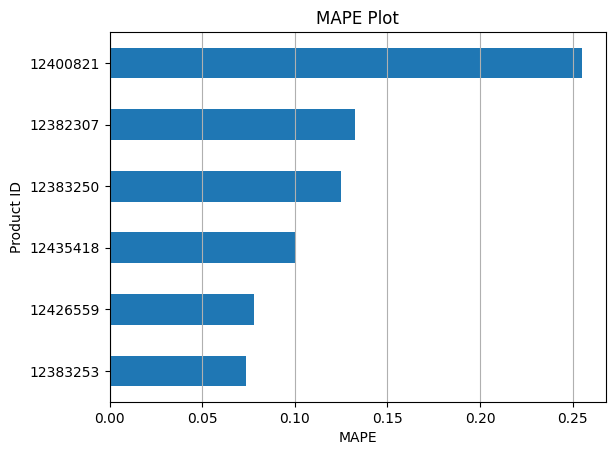

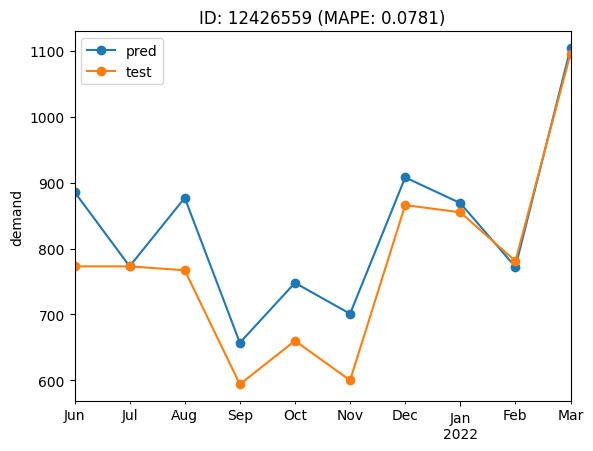

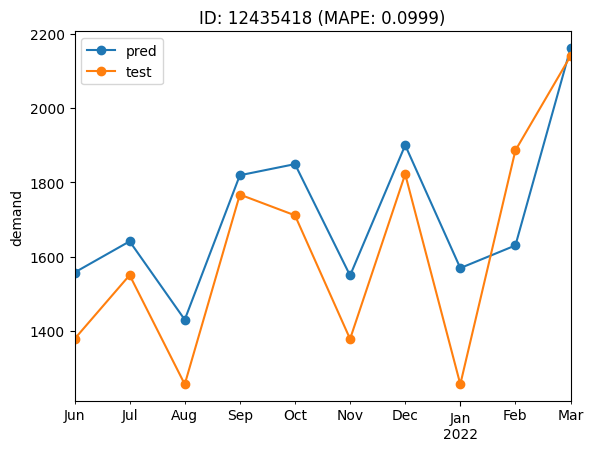

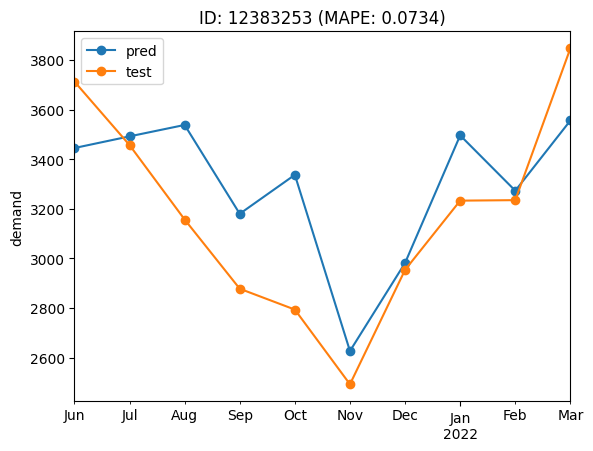

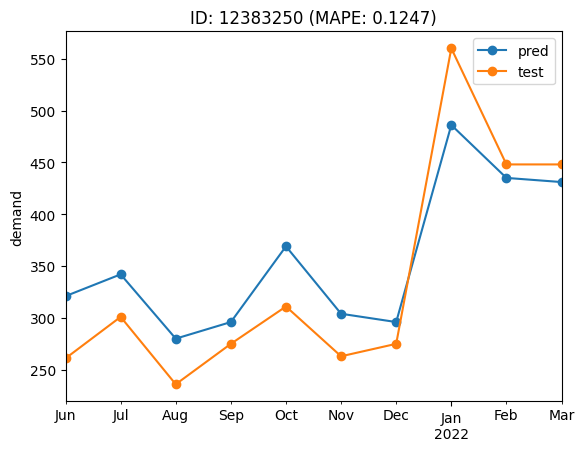

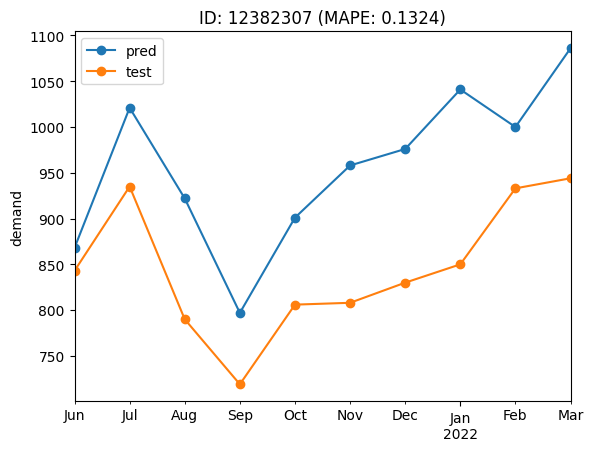

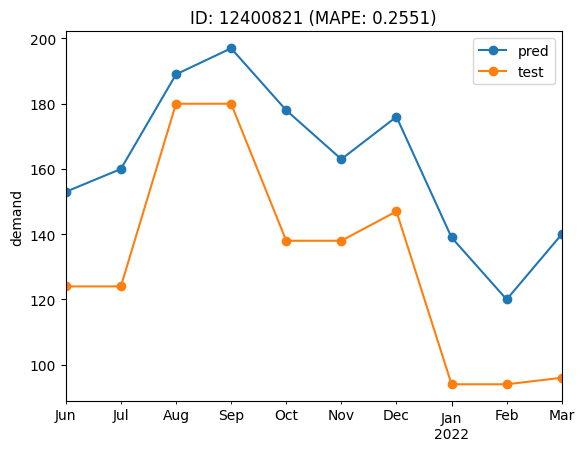

In [ ]:
import os
from sklearn.metrics import mean_absolute_percentage_error

level_to_forecast = [(id, 'demand') for id in ids] #+ [(id, 'monthly_demand') for id in ids]
mape, predictions_ms = backtesting_forecaster_multiseries(
    forecaster         = forecaster_ms,
    series             = group_demand_df.resample("D").sum(),
    levels             = level_to_forecast,
    steps              = 1,
    metric             = 'mean_absolute_percentage_error',
    initial_train_size = len(data_train) + len(data_val),
    refit              = False,
    fixed_train_size   = False,
    verbose            = False,
    random_state       = 123,
    # exog               = group_demand_df.resample("D").sum()['CommonExogs']
) 

# MONTHLY PREDICTIONS
daily_pred = predictions_ms[[(id, 'demand') for id in ids]]
predictions = pd.DataFrame()

for id in ids:
    df = data_test.reset_index()
    dates = df.loc[df['date'].dt.day == 1, 'date']

    prod_monthly_gt = df.loc[df['date'].dt.day == 1, (id, 'monthly_demand')]
    inds = prod_monthly_gt.index

    # calc monthly preds from daily preds
    prod = daily_pred[(id, 'demand')]
    monthly_preds = {}
    for s, e in zip(inds, inds[1:]): # s:e = [s,e) = [s,e-1]
        monthly_preds[dates[s]] = int(np.round(prod[s:e].sum()))
    monthly_preds[dates[e]] = int(np.round(prod[e:].sum())) # last month

    prod_monthly_gt.index = dates
    tmp = pd.DataFrame({'pred': monthly_preds,
                        'gt': prod_monthly_gt})
    tmp.columns = pd.MultiIndex.from_tuples([(id, 'pred'), (id, 'gt')])
    predictions = pd.concat([predictions, tmp], axis=1)

save = f'./output/predictions_{BRAND}_2'
if not os.path.exists(save):
    os.makedirs(save)

try:
    predictions.to_csv(f'{save}/predictions_{BRAND}.csv')
except:
    print(f'Cannot save predictions_{BRAND}.csv')

# MAPE
data = {}
for id in ids:
    gt = predictions[id]['gt']
    pred = predictions[id]['pred']
    data[id] = [mean_absolute_percentage_error(gt, pred)]
df = pd.DataFrame(data, index=['MAPE'])
display(df)

if len(ids) > 1:
    tmp = df.T.reset_index().sort_values('MAPE')
    fig, ax = plt.subplots()
    tmp.plot.barh(x='index', y='MAPE', legend=None, ax=ax)
    ax.set(xlabel = "MAPE", ylabel = "Product ID", title = "MAPE Plot", facecolor = "white")
    ax.xaxis.grid(True)
    try:
        plt.savefig(os.path.join(save, f'MAPE_plot.png'))
    except:
        print(f"Cannot save {save}/MAPE_plot.png")

# PRED VIZ
for id in ids:
    plt.figure(facecolor="white")
    predictions[id]['pred'].plot(label='pred', marker='o')
    predictions[id]['gt'].plot(label='test', marker='o')
    plt.title(f"ID: {id} (MAPE: %.4f)" % df[id]['MAPE'])
    plt.legend()
    plt.ylabel("demand")

    try:
        plt.savefig(os.path.join(save, f'{id}.png'))
    except:
        print(f"Cannot save {save}/{id}.png")

## Feature importance

In [16]:
from skforecast.utils import load_forecaster
forecaster_ms = load_forecaster(f'./output/models/forecaster_ms_{BRAND}_2.py')

[03:34:28] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.

ForecasterAutoregMultiSeries 
Regressor: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=

In [ ]:
# preprocess
ft_imp = forecaster_ms.get_feature_importance()
ft_imp = ft_imp.sort_values("importance")
ft_imp = ft_imp[ft_imp['importance'] != 0] # loại đi importance = 0
ft_imp['feature'] = ft_imp['feature'].apply(lambda x: x[1] if isinstance(x, tuple) else x)
ft_imp = ft_imp[ft_imp['feature'] != 'monthly_demand']

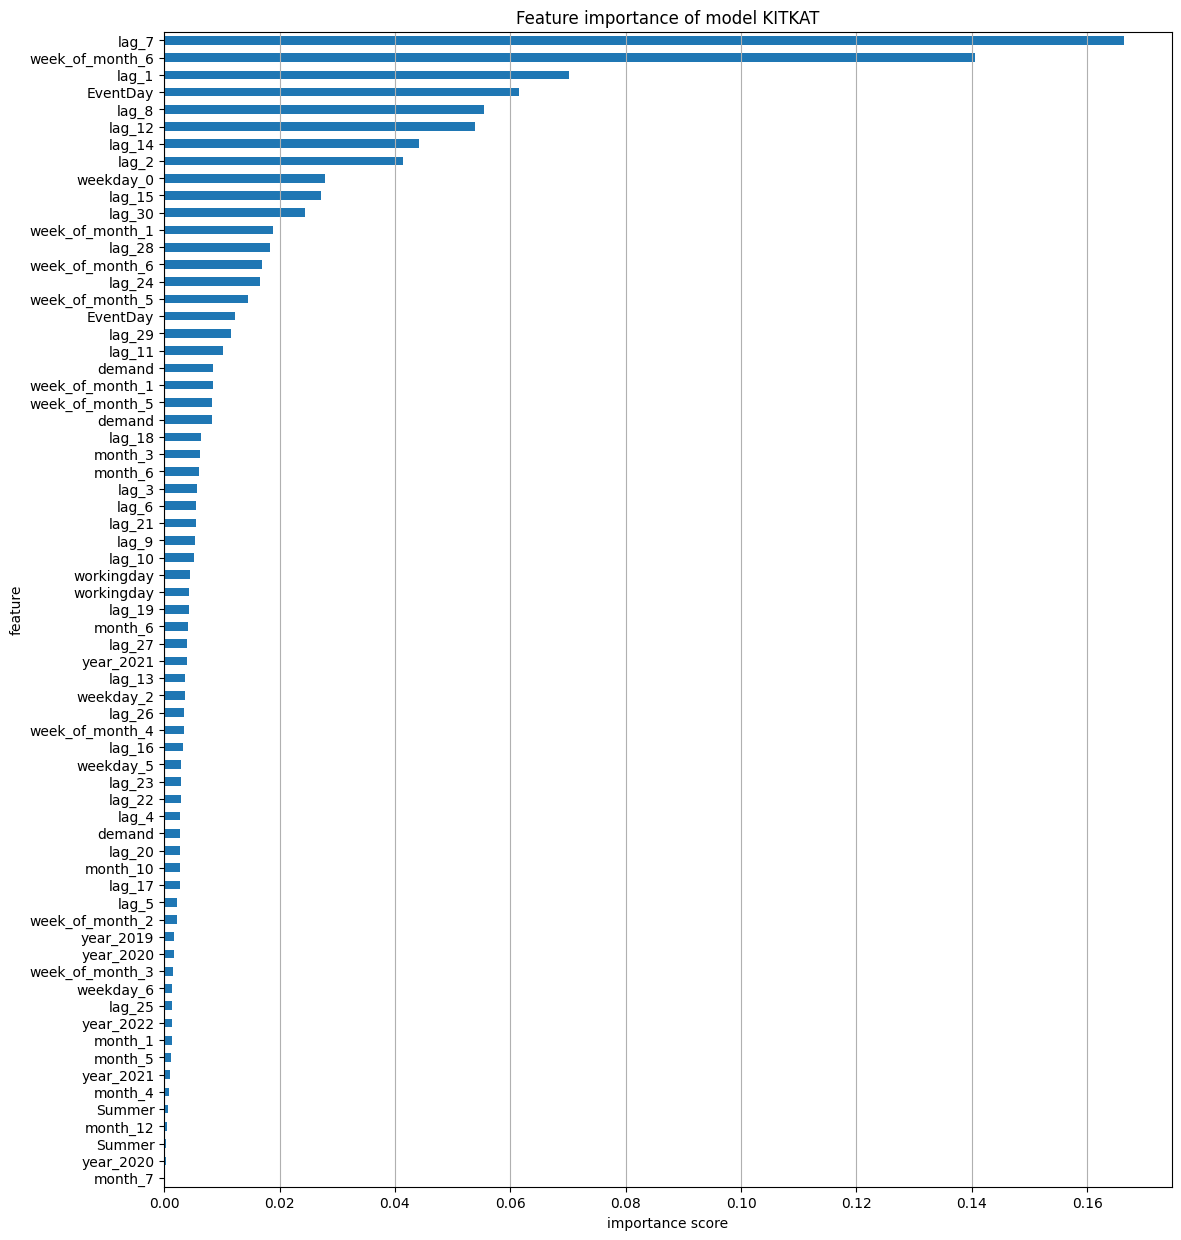

In [ ]:
fig, ax = plt.subplots(figsize=(13, 15))
ft_imp.plot.barh(x='feature', y='importance', legend=None, ax=ax)
ax.set(xlabel="importance score", title=f"Feature importance of model {BRAND}")
ax.xaxis.grid(True)
plt.savefig(f'./output/feature_importance/{BRAND}.png')

# Post-process
Trực quan hoá toàn bộ 23 sản phẩm để có cái nhìn tổng quan nhất

- Tạo dataframe có 2 cột với cột đầu `index` là mã sản phẩm và cột 2 là `MAPE` (10 tháng) tương ứng của sản phẩm đó

In [13]:
from glob import glob
glob('./output/predictions_*_2/')

['./output/predictions_KITKAT_2/',
 './output/predictions_NESTEA IC_2/',
 './output/predictions_OREO_2/',
 './output/predictions_NAMA_2/',
 './output/predictions_MINT CHOC_2/',
 './output/predictions_LA FRUTTA_2/',
 './output/predictions_MILO_2/',
 './output/predictions_MOCHI_2/']

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from glob import glob
import warnings
warnings.filterwarnings('ignore')

dirs = glob('./output/predictions_*_2/') # loop through all predictions of each brand
mape_df = pd.DataFrame()

for dir in dirs:
    # dir = dirs[0]
    file = glob(f"{dir}/*.csv")[0]
    df = pd.read_csv(file, header=[0, 1])
    df.drop(columns=['Unnamed: 0_level_0'], inplace=True)
    ids = list(set([item[0] for item in df.columns]))

    data = {}
    for id in ids:
        gt = df[id]['gt']
        pred = df[id]['pred']
        data[id] = [mean_absolute_percentage_error(gt, pred)]
    mape_df = pd.concat([mape_df,
                         pd.DataFrame(data, index=['MAPE'])],
                        axis = 1)

mape_df = mape_df.T.reset_index().sort_values('MAPE')
mape_df

,index,MAPE
4,12404985,0.053030
22,12477101,0.053373
18,12385000,0.056024
19,12291880,0.056439
21,12271016,0.056591
5,12405048,0.056675
2,12271026,0.057673
7,12383253,0.065875
12,12435405,0.069815
1,12425670,0.078114


- Thêm cột thứ 3 để đánh giá xem MAPE thuộc loại nào, thấp (Low error), vừa (Medium error) hay cao (High error)

In [ ]:
def labelize(x):
    if x < 0.2:
        return "Low error"
    if 0.2 <= x <= 0.4:
        return "Medium error"
    else:
        return "High error"
mape_df['type'] = mape_df['MAPE'].apply(labelize)
mape_df.set_index('type', inplace=True)
mape_df

,index,MAPE
type,,
Low error,12404985,0.053030
Low error,12477101,0.053373
Low error,12385000,0.056024
Low error,12291880,0.056439
Low error,12271016,0.056591
Low error,12405048,0.056675
Low error,12271026,0.057673
Low error,12383253,0.065875
Low error,12435405,0.069815


- Trực quan hoá 23 sản phẩm theo thứ tự MAPE giảm dần:

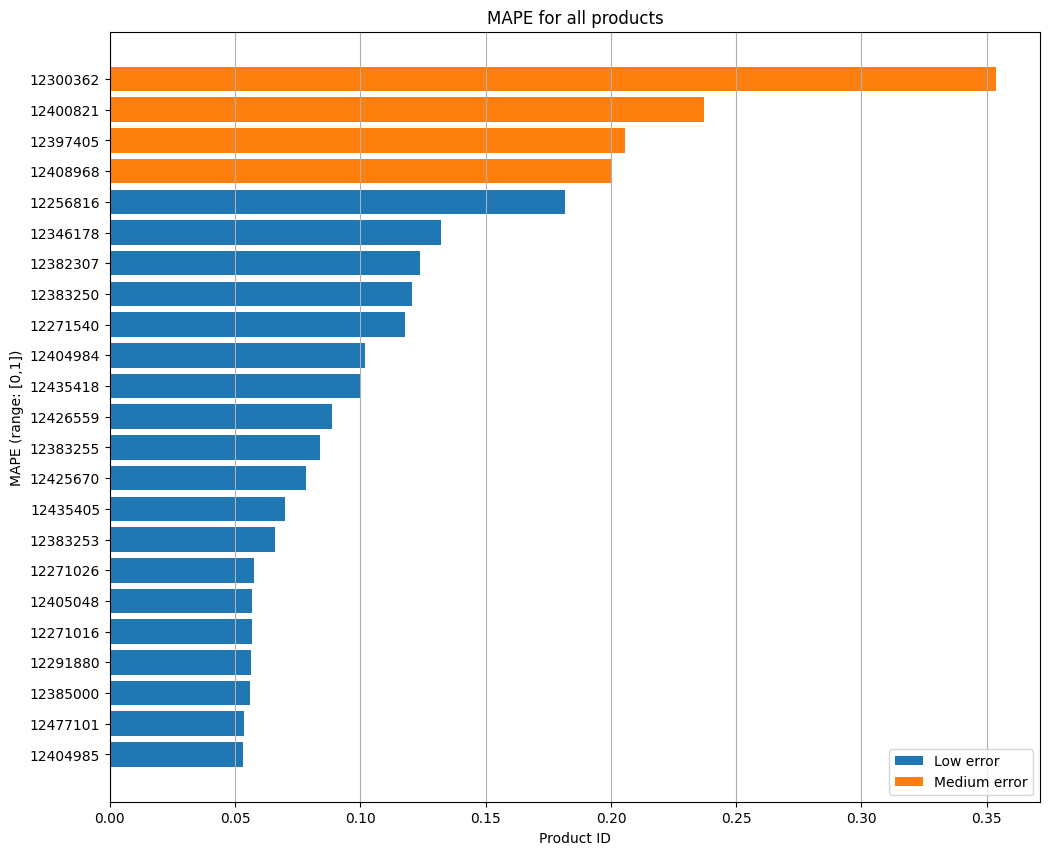

In [ ]:
fig, ax = plt.subplots(facecolor='white', figsize=(12,10))

for err_type in mape_df.index.unique():
    plt.barh(data=mape_df.loc[err_type], y='index', width='MAPE', label=err_type)
    
plt.legend()
plt.xlabel('Product ID')
plt.ylabel('MAPE (range: [0,1])')
plt.title("MAPE for all products")
ax.xaxis.grid(True)
plt.savefig('./output/MAPE_all_products.png')

# Chuẩn bị data cho work flow 2
**Note**: Chạy từ phần Tuning trở lên trước rồi mới chạy phần này

## Get ShelfLifeInDays
lấy 23 pred của 23 sku (305 ngày cuối) -> mean -> sort descending -> culmulative -> ABC

In [31]:
ls = ['12425670', '12385000', '12383255', '12346178', '12477101', '12435405', '12404984', '12383253']
daily_demand.loc[daily_demand['product_id'].isin(ls), ['product_id', 'ShelfLifeInDays']].drop_duplicates()

,product_id,ShelfLifeInDays
0,12385000,730
1127,12477101,365
2254,12425670,365
4508,12435405,730
6762,12404984,365
12397,12383253,730
15778,12383255,730
18032,12346178,730


## Predict daily demand 10 tháng kể từ 04/01/2022

In [32]:
from datetime import date, timedelta

def is_event(x):
    holiday_df = pd.read_csv('data/holidays.csv')
    holiday_df['month'] = holiday_df['date'].apply(lambda x: x.split('/')[-1]).astype(int)
    holiday_df['day'] = holiday_df['date'].apply(lambda x: x.split('/')[0]).astype(int)
    for m_event, d_event in zip(holiday_df['month'], holiday_df['day']):
        if x.month == m_event and x.day == d_event:
            return 1
    return 0

def is_workingday(date): # 0: holiday, 1: workingday
    holiday_df = pd.read_csv('data/holidays.csv')
    holiday_df = holiday_df.set_index('date')
    for holiday in holiday_df.index: # d/m
        if date.month == holiday.split('/')[-1] and date.day == holiday.split('/')[0]:
            return holiday_df.loc[holiday]['workingday']
    
    if date.weekday() in [5,6]: # weekend -> workingday = 0
        return 0
    return 1

exogs = ['weekday', 'month', 'week_of_month', 'year', 'workingday', 'Summer', 'EventDay']
sdate, edate = date(2022,4,1), date(2023,1,31) # 10 tháng dự đoán thực tế

df_predict = pd.DataFrame()
df_predict['date'] = pd.date_range(start=sdate, end=edate)
df_predict['weekday'] = df_predict['date'].dt.dayofweek
df_predict['month'] = df_predict['date'].dt.month
df_predict['year'] = df_predict['date'].dt.year
df_predict['week_of_month'] = df_predict['date'].apply(week_of_month)
df_predict['workingday'] = df_predict['date'].apply(is_workingday)
df_predict['Summer'] = df_predict['date'].dt.month.isin([5,6,7]).astype(int)
df_predict['EventDay'] = df_predict['date'].apply(is_event)

# final
df_predict.set_index("date", inplace=True)
df_predict

,weekday,month,year,week_of_month,workingday,Summer,EventDay
date,,,,,,,
2022-04-01,4,4,2022,1,1,0,0
2022-04-02,5,4,2022,1,0,0,0
2022-04-03,6,4,2022,1,0,0,0
2022-04-04,0,4,2022,2,1,0,0
2022-04-05,1,4,2022,2,1,0,0
...,...,...,...,...,...,...,...
2023-01-27,4,1,2023,5,1,0,0
2023-01-28,5,1,2023,5,0,0,0
2023-01-29,6,1,2023,5,0,0,0


In [33]:
df_predict = pd.get_dummies(df_predict, columns=['week_of_month', 'month', 'weekday', 'year'])

for i in [2021, 2020, 2019]:
    df_predict[f'year_{i}'] = 0

df_predict['month_3'] = 0
df_predict['month_2'] = 0
df_predict.drop(columns=['year_2023'], inplace=True) # luật nội suy (0,0,0) -> cái còn lại là 1

assert not set(data_train['CommonExogs'].columns).difference(set(df_predict.columns)) 
df_predict

,workingday,Summer,EventDay,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5,week_of_month_6,month_1,...,weekday_3,weekday_4,weekday_5,weekday_6,year_2022,year_2021,year_2020,year_2019,month_3,month_2
date,,,,,,,,,,,,,,,,,,,,,
2022-04-01,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2022-04-02,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2022-04-03,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2022-04-04,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2022-04-05,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,1,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2023-01-28,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2023-01-29,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [43]:
from skforecast.utils import load_forecaster
import datetime
import warnings
warnings.filterwarnings('ignore')

prediction = {'product_id': ls, 'mean': [], 'std': []}
for id in ls:
    brand = daily_demand.loc[daily_demand['product_id'] == id, 'Brand'].iloc[0]
    forecaster_ms = load_forecaster(f'./output/models/forecaster_ms_{brand}.py', verbose=False)

    # daily prediction 
    predictions_ms = forecaster_ms.predict(
        steps = len(df_predict),
        exog = df_predict.asfreq("D")
    ).set_index(df_predict.index)

    # monthly prediction
    daily_pred = predictions_ms[[(id, 'demand')]]

    df = df_predict.reset_index()
    dates = df.loc[df['date'].dt.day == 1, 'date']
    dates

    # calc monthly preds from daily preds
    monthly_preds = {}
    for s, e in zip(dates, dates[1:]): # s:e = [s,e) = [s,e-1]
        e_include = final_index(datetime.datetime.strptime(str(e), '%Y-%m-%d %H:%M:%S').strftime("%Y-%m-%d"))
        monthly_preds[s] = int(np.round(daily_pred.loc[s:e_include, (id, 'demand')].sum()))
    monthly_preds[e] = int(np.round(daily_pred[e:].sum())) # last month
    
    # get mean & std
    prediction['mean'].append(int(np.round(np.mean(list(monthly_preds.values())))))
    prediction['std'].append(int(np.round(np.std(list(monthly_preds.values())))))

prediction_df = pd.DataFrame(prediction)
prediction_df

,product_id,mean,std
0,12425670,3709,655
1,12385000,6076,990
2,12383255,7372,1192
3,12346178,785,125
4,12477101,2729,395
5,12435405,1146,71
6,12404984,2544,190
7,12383253,6228,542


## Get DailyProfit

In [41]:
from glob import glob 
import os
from datetime import date, timedelta

sdate, edate = date(2022,4,1), date(2023,1,31)
data = {'ids': ls, 'DailyProfit': []}

for id in ls:
    data['DailyProfit'].append(
        daily_demand.loc[daily_demand['product_id'] == id, 'ProfitPerCase'].iloc[0] * 
        prediction_df.loc[prediction_df['product_id'] == id, 'mean'].iloc[0]
    )
DailyProfit_df = pd.DataFrame(data)
DailyProfit_df

,ids,DailyProfit
0,12425670,1041227570
1,12385000,667752400
2,12383255,1294080880
3,12346178,228081750
4,12477101,896476500
5,12435405,276415200
6,12404984,388214400
7,12383253,1126645200
